In [2]:
import pandas as pd

file_path = "/Users/christophersicking/Desktop//IMDB_Rating/BlackFriday.csv"

df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df = pd.get_dummies(df, columns=[
    "Gender",
    "Age",
    "City_Category",
    "Stay_In_Current_City_Years",
    "Occupation"
])

df.head()

,User_ID,Product_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1000001,P00069042,0,3,NaN,NaN,8370,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,1,6.0,14.0,15200,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,0,12,NaN,NaN,1422,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,0,12,14.0,NaN,1057,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,0,8,NaN,NaN,7969,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
df = df.groupby(by=["User_ID"]).mean()
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,10.0,0.0,5.676471,6.285714,10.571429,9808.264706,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1000002,16.0,0.0,4.394737,9.981481,13.807692,10662.539474,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1000003,15.0,0.0,3.206897,5.086957,11.384615,11780.517241,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1000004,7.0,1.0,1.000000,8.500000,14.111111,15845.153846,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1000005,20.0,1.0,6.216981,11.068966,12.937500,7745.292453,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
# Bring in dependencies
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

len(df.index)

0

In [18]:
# Create an empty list
X = []



# Loop through the rows
for i in range(len(df.index)):
    info = [
        list(df["Gender_F"])[i],
        list(df["Gender_M"])[i],
        list(df["Age_0-17"])[i],
        list(df["Age_18-25"])[i],
        list(df["Age_26-35"])[i],
        list(df["Age_36-45"])[i],
        list(df["Age_46-50"])[i],
        list(df["Age_51-55"])[i],
        list(df["Age_55+"])[i],
        list(df["City_Category_A"])[i],
        list(df["City_Category_B"])[i],
        list(df["City_Category_C"])[i],
        list(df["Stay_In_Current_City_Years_1"])[i],
        list(df["Stay_In_Current_City_Years_2"])[i],
        list(df["Stay_In_Current_City_Years_3"])[i],
        list(df["Stay_In_Current_City_Years_4+"])[i]
    ]
    
    # Append the lists to empty list: X
    X.append(info)
    
# Create the y variable 
y = [round(val) for val in df["Purchase"]]

# Create and formate the test/train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

array([ 6568, 11916,  8475, ..., 10663, 10569,  8648])

k: 1, Train/Test Score: 0.047/0.000
k: 3, Train/Test Score: 0.044/0.000
k: 5, Train/Test Score: 0.041/0.000
k: 7, Train/Test Score: 0.040/0.000
k: 9, Train/Test Score: 0.038/0.000
k: 11, Train/Test Score: 0.036/0.000
k: 13, Train/Test Score: 0.034/0.000
k: 15, Train/Test Score: 0.033/0.000
k: 17, Train/Test Score: 0.030/0.000
k: 19, Train/Test Score: 0.029/0.000
k: 21, Train/Test Score: 0.028/0.000
k: 23, Train/Test Score: 0.027/0.000
k: 25, Train/Test Score: 0.026/0.000
k: 27, Train/Test Score: 0.025/0.000
k: 29, Train/Test Score: 0.024/0.000
k: 31, Train/Test Score: 0.023/0.000
k: 33, Train/Test Score: 0.023/0.000
k: 35, Train/Test Score: 0.022/0.000
k: 37, Train/Test Score: 0.022/0.000
k: 39, Train/Test Score: 0.022/0.000
k: 41, Train/Test Score: 0.021/0.000
k: 43, Train/Test Score: 0.020/0.000
k: 45, Train/Test Score: 0.020/0.000
k: 47, Train/Test Score: 0.021/0.000
k: 49, Train/Test Score: 0.020/0.000


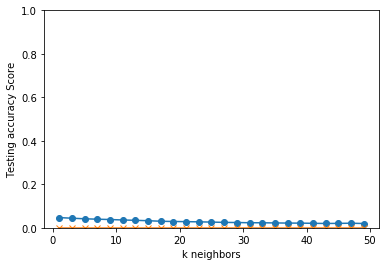

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.ylim(top=1, bottom=0)
plt.show()

In [12]:
x = 65.6789
y = round(x)
y

66